In [5]:
import pandas as pd # data manipulation
import matplotlib.pyplot as plt #plotting 
import numpy as np
from sklearn.preprocessing import StandardScaler #machine learning 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

#social network ads csv
sna= pd.read_csv('Social_Network_Ads.csv')
sna.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


##  Linear SVM and support vectors
We will use the Social Network Ads data, available on Kaggle [link]. The .csv file is also available at our course website. 

The goal is to classify the outcome 'Purchased', and we will only use the two continuous variables 'EstimatedSalary' and 'Age'. Scale and center both covariates before you proceed with the analysis. For this question, you should use the e1071 package. Complete the following tasks:

- Produce a 2d scatter plot of the data, with each observation colored by the outcome. Use pch = 19 for the dots.
-  Fit a linear SVM with cost = 1. Do not scale or center in the svm() function.
- What is the training data (in-sample) classification error? Also provide a confusion table of the results.
-  Draw the decision line on the plot. For this question, you should use coefs, SV and rho from the fitted object, and calculate β and β0. Note that the decision line is f(x)=xTβ+β0=0f(x)=xTβ+β0=0, you can calculate the decision line based these quantities. An example can be found in the lecture note.
-  Mark the support vectors on the plot (with a circle on the observation, use cex = 2).

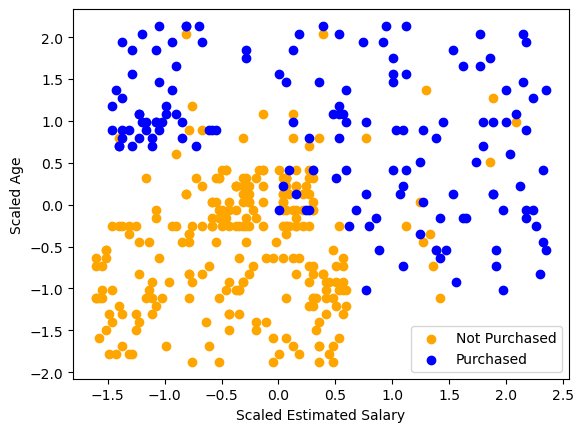

In [24]:
# Produce a 2D Scatter Plot
scaler= StandardScaler()
X= scaler.fit_transform(sna[['EstimatedSalary', 'Age']])
y= sna['Purchased']

# Plotting the data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='orange', marker='o', label='Not Purchased')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Purchased')
plt.xlabel('Scaled Estimated Salary')
plt.ylabel('Scaled Age')
plt.legend()

In [25]:
#fit linear SVM
svm= SVC(kernel='linear', C=1)
svm.fit(X,y)

SVC(C=1, kernel='linear')

In [26]:
# In-sample prediction and confusion matrix
y_pred = svm.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
classification_error = 1 - np.mean(y_pred == y)

In [15]:
classification_error

0.15749999999999997

In [18]:
conf_matrix

array([[240,  17],
       [ 46,  97]])

In [30]:
# Fit a linear SVM with cost = 1
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X, y) 

SVC(C=1, kernel='linear')

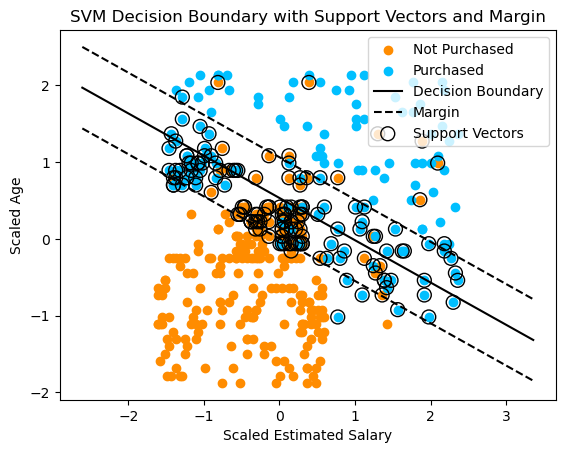

In [33]:
# Plot the scaled data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='darkorange', label='Not Purchased')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='deepskyblue', label='Purchased')

# Plot the decision boundary
w = svm_model.coef_[0]
b = svm_model.intercept_[0]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx = np.linspace(x_min, x_max)
yy = (-w[0] * xx - b) / w[1]

# Calculate the margin
margin = 1 / np.linalg.norm(w)

# Plot the decision boundary and margins
plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.plot(xx, yy + margin, 'k--', label='Margin')
plt.plot(xx, yy - margin, 'k--')

# Highlight the support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Scaled Estimated Salary')
plt.ylabel('Scaled Age')
plt.legend()
plt.title('SVM Decision Boundary with Support Vectors and Margin')
plt.show()

In [17]:

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("Classification Error:", classification_error)

Confusion Matrix:
 [[240  17]
 [ 46  97]]
Classification Error: 0.15749999999999997
